# Visualizing Countries of the World Data

From Kaggle: https://www.kaggle.com/fernandol/countries-of-the-world

### Step 1. Import the necessary libraries

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Assign it to a variable called Countries.

In [169]:
# Convert decimal ',' to '.' to align with python convention for floats
Countries = pd.read_csv('countries of the world.csv', decimal=',')

### Step3. See the first 10 entries

In [170]:
print(Countries.index)
print(Countries.columns.tolist() )
Countries.head(10)

RangeIndex(start=0, stop=227, step=1)
['Country', 'Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


### Step 4. Create a histogram of the population size per country

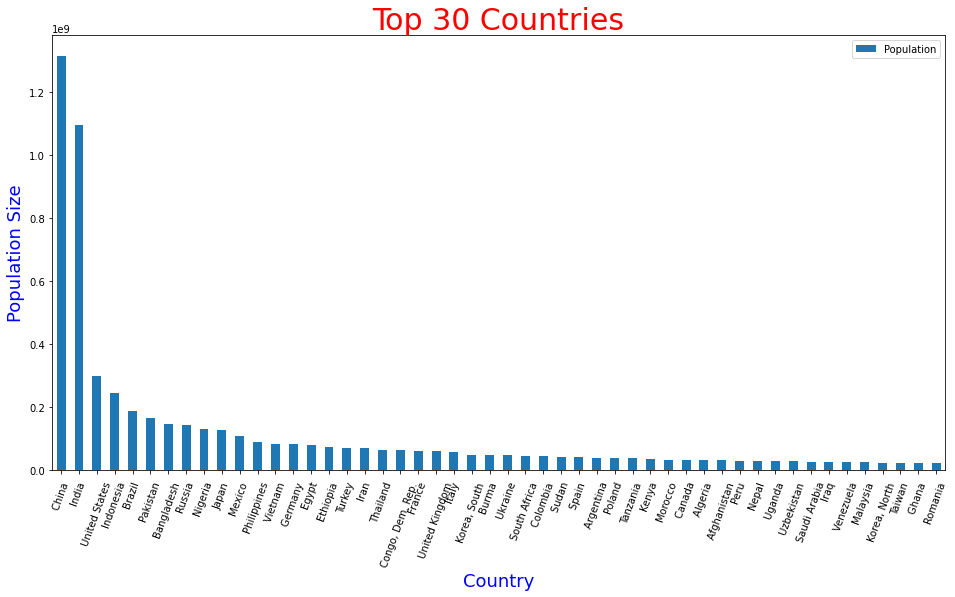

In [186]:
# sum() is needed otherwise sort_values is not valid
Data = Countries.groupby('Country').sum().sort_values(['Population'], ascending=False)[['Population']].head(50)

Data.plot(kind='bar',figsize=(16, 8) )
plt.xlabel('Country',fontsize=18, color = 'blue')
plt.xticks(rotation=70)
plt.ylabel('Population Size',fontsize=18, color = 'blue')
plt.title('Top 30 Countries', fontsize=30, color = 'red')
plt.show()

### Step 5. Create a scatterplot with the Population Size vs. Population Density - Top 50 Countries in Size
#### X-axis: Population Density, Y-axis: Population Size

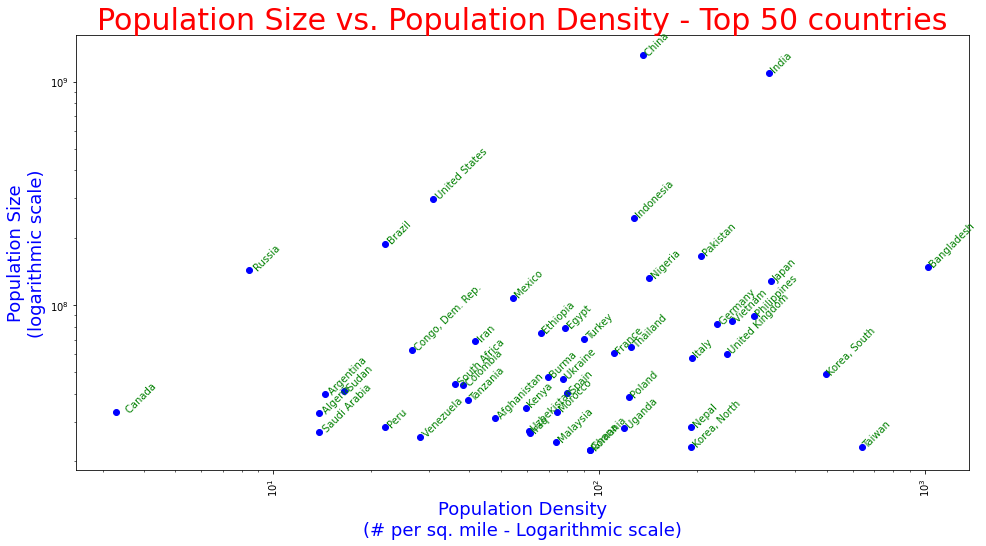

In [176]:
# Convert 'Pop. Density (per sq. mi.)' from string to float in order to be able to sort the values for increasing
# numerical values on the scatter plot X axis:
Countries['Pop. Density (per sq. mi.)'] = Countries['Pop. Density (per sq. mi.)'].apply(lambda x: float(x))

# Select the 3 columns used in the scatter plot:
Data = Countries[["Country", "Population", "Pop. Density (per sq. mi.)"]].sort_values(['Population', 'Pop. Density (per sq. mi.)'], ascending=False).head(50)
x = Data["Pop. Density (per sq. mi.)"]
y = Data.Population
if (x.shape != y.shape):
     print(" X and Y need same number of parameters for scatter plot!!!")

# Set-up figure, sizes are in inch
plt.figure(figsize=(16, 8))

plt.xlabel('Population Density\n(# per sq. mile - Logarithmic scale)', fontsize=18, color = 'blue')
plt.xticks(rotation=90)
plt.ylabel('Population Size\n(logarithmic scale)', fontsize=18, color = 'blue')
plt.title('Population Size vs. Population Density - Top 50 countries', fontsize=30, color = 'red')
# put logarithmic scale on axis
plt.xscale("log")
plt.yscale("log")

# put the data
plt.scatter(x, y, color='blue')

# add a label to each scatter point
for xx, yy, cc in zip(x, y, Data.Country):
    # add spacing to coordinates, but is mangled by logarithmic scale
    plt.text(xx+.2, yy+.2, cc, rotation=45, color='green')


### Step 6. Top 5 countries by size.

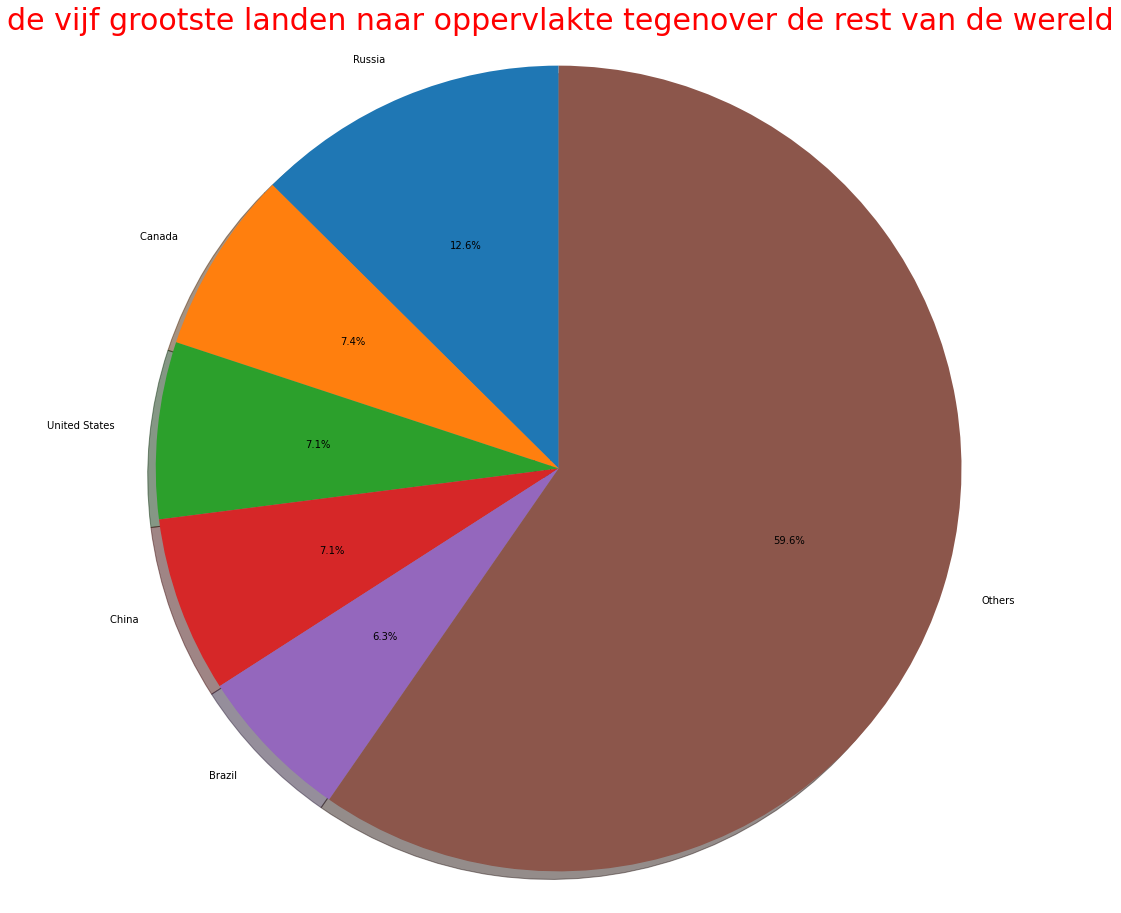

In [190]:
#de vijf grootste landen naar oppervlakte tegenover de rest van de wereld
import matplotlib.pyplot as plt

xdat=Countries.sort_values('Area (sq. mi.)', ascending=False).head(5)['Country']
xlist=xdat.values.tolist()
xlist.append('Others')

ydat=Countries.sort_values('Area (sq. mi.)', ascending=False).head(5)['Area (sq. mi.)']
ylist=ydat.values.tolist()
ylist.append(Countries.sort_values('Area (sq. mi.)', ascending=False).tail(222)['Area (sq. mi.)'].sum())


import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = xlist
sizes = ylist
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16, 16))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('de vijf grootste landen naar oppervlakte tegenover de rest van de wereld', fontsize=30, color = 'red')
plt.show()

Step 7. Top 5 countries by size.

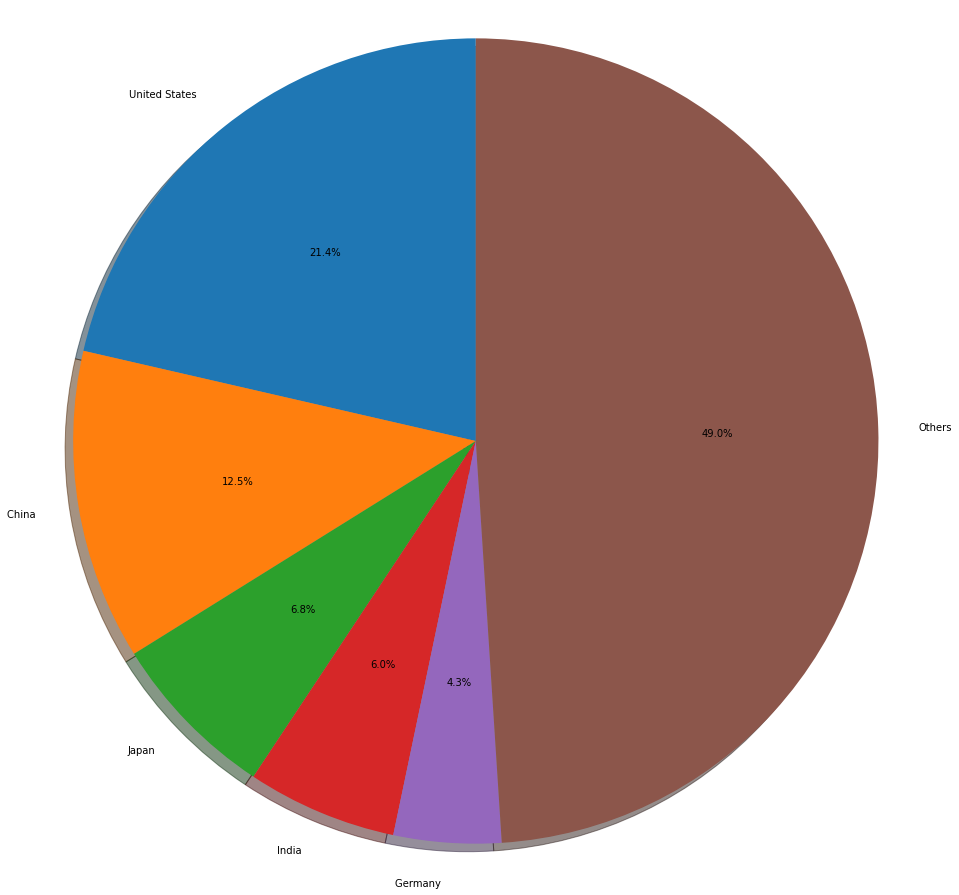

In [192]:
import matplotlib.pyplot as plt

Countries['Gdp'] = Countries['GDP ($ per capita)']*Countries['Population']
xdat=Countries.sort_values('Gdp', ascending=False).head(5)['Country']
xlist=xdat.values.tolist()
xlist.append('Others')

ydat=Countries.sort_values('Gdp', ascending=False).head(5)['Gdp']
ylist=ydat.values.tolist()
ylist.append(Countries.sort_values('Gdp', ascending=False).tail(222)['Gdp'].sum())

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = xlist
sizes = ylist
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16, 16))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()